## Installing Dependencies

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [7]:
df = pd.read_csv("clean_resume_data.csv")

In [8]:
df.head()

ID Category                                            Feature
0  16852973       HR  hr administrator marketing associate hr admini...
1  22323967       HR  hr specialist hr operations summary media prof...
2  33176873       HR  hr director summary years experience recruitin...
3  27018550       HR  hr specialist summary dedicated driven dynamic...
4  17812897       HR  hr manager skill highlights hr skills hr depar...

In [9]:
df.shape

(2484, 3)

In [72]:
df["Feature"][200]

'freelance graphic designer highlights web print design skills software visual elements image photo typography color management image file prep retouching resizing formatting packaging press check software adobe creative suite photoshop design illustrator acrobat creative cloud tumblr square space word press basic html css microsoft office word excel power point outlook mac os experience freelance graphic designer current city state influential graphic designer high end jewelry company new york city brought originality curiosity enthusiasm accountability grit table everyday nearly four years started jewelry company called wyndesigns college brand encouraged women wear name proudly gia accredited gemologist professional played instrumental role development rollins college women lacrosse program captain senior year website www lgoodwyn com rollins college portfolio http www blurb com ebooks envision art design experience created icon logo evolve space company provides open space environm

In [10]:
df["Category"].value_counts()

Category
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
ADVOCATE                  118
CHEF                      118
ENGINEERING               118
ACCOUNTANT                118
FINANCE                   118
FITNESS                   117
AVIATION                  117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: count, dtype: int64

## Exploratory Data Analysis

<Axes: xlabel='Category'>

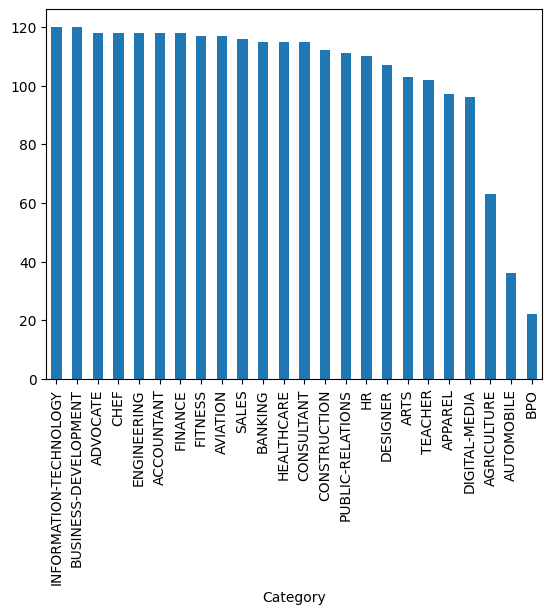

In [12]:
df["Category"].value_counts().plot(kind = 'bar')

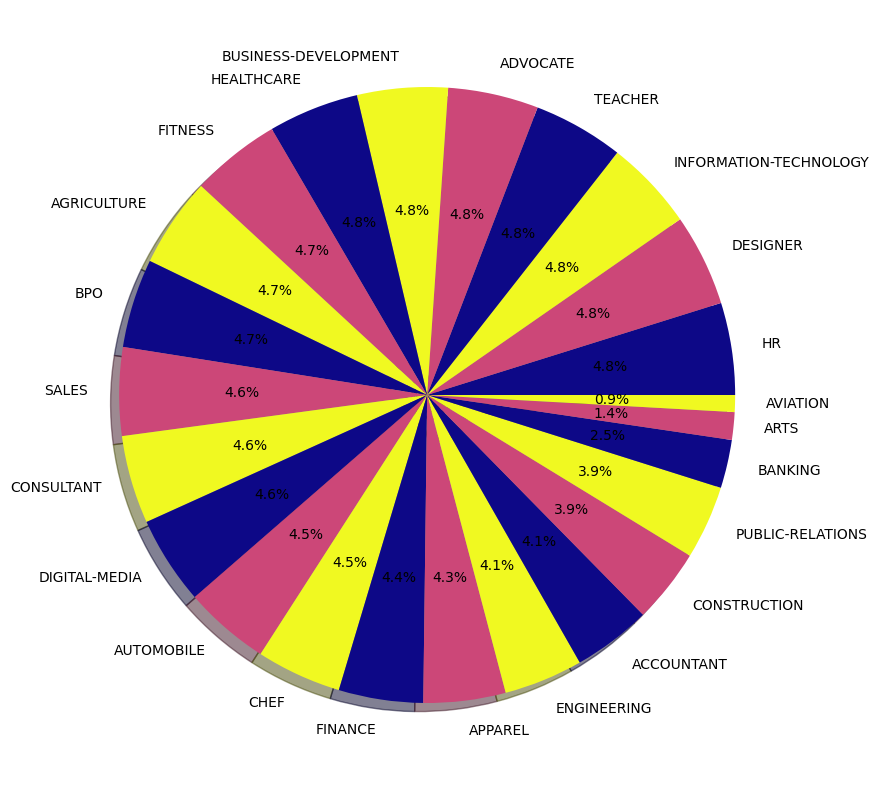

In [18]:
counts = df['Category'].value_counts()
labels = df['Category'].unique()
plt.figure(figsize=(14,10))
plt.pie(counts, labels = labels , autopct = "%1.1f%%", shadow= True, colors = plt.cm.plasma(np.linspace(0,1,3)))
plt.show()

## Balance Dataset

In [19]:
from sklearn.utils import resample

In [20]:
# Defining the maximum count among all the categories
max_count = df['Category'].value_counts().max()

# Resample each category to match maximum count
balanced_data = []
for category in df['Category'].unique():
    category_data = df[df['Category']== category]
    if len(category_data) < max_count:
        #Perform oversampling for categories with fewer samples
        balanced_category_data = resample(category_data, replace = True, n_samples = max_count, random_state = 42)
    else:
        #perform undersampling for categories with more samples
        balanced_category_data= resample(category_data, replace = False, n_samples = max_count, random_state = 42)
    balanced_data.append(balanced_category_data)

# Concat the balanced data for all categories
balanced_df = pd.concat(balanced_data)

In [22]:
balanced_df['Category'].value_counts()

Category
HR                        120
DESIGNER                  120
INFORMATION-TECHNOLOGY    120
TEACHER                   120
ADVOCATE                  120
BUSINESS-DEVELOPMENT      120
HEALTHCARE                120
FITNESS                   120
AGRICULTURE               120
BPO                       120
SALES                     120
CONSULTANT                120
DIGITAL-MEDIA             120
AUTOMOBILE                120
CHEF                      120
FINANCE                   120
APPAREL                   120
ENGINEERING               120
ACCOUNTANT                120
CONSTRUCTION              120
PUBLIC-RELATIONS          120
BANKING                   120
ARTS                      120
AVIATION                  120
Name: count, dtype: int64

## Train Test aplit

In [23]:
balanced_df.isnull().sum()

ID          0
Category    0
Feature     1
dtype: int64

In [24]:
balanced_df.dropna(inplace = True)

In [25]:
X= balanced_df['Feature']
y= balanced_df['Category']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.2, random_state = 42)

## Encoding (TF-IDF)

In [26]:
# tfidf= TfidfVectorizer()

In [27]:
# X_train_tfidf = tfidf.fit_transform(X_train)
# X_test_tfidf = tfidf.fit_transform(X_test)

In [29]:
# X_test_tfidf

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 182064 stored elements and shape (576, 17589)>

In [39]:
from sklearn.metrics import classification_report

In [40]:
# Step 1: Initialize and fit TF-IDF only on training data
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)

# Step 2: Transform test data using the *same* vectorizer
X_test_tfidf = tfidf.transform(X_test)

# Step 3: Train the model
rf = RandomForestClassifier()
rf.fit(X_train_tfidf, y_train)

# Step 4: Predict
y_pred = rf.predict(X_test_tfidf)

In [42]:
accuracy = accuracy_score(y_test,y_pred)
print('accuracy:', accuracy)

accuracy: 0.8402777777777778


In [44]:
print( classification_report(y_test,y_pred))

                        precision    recall  f1-score   support

            ACCOUNTANT       0.76      0.90      0.83        21
              ADVOCATE       0.96      0.79      0.87        29
           AGRICULTURE       0.95      0.78      0.86        23
               APPAREL       0.89      0.81      0.85        21
                  ARTS       1.00      0.64      0.78        22
            AUTOMOBILE       0.95      1.00      0.97        19
              AVIATION       0.91      1.00      0.95        30
               BANKING       1.00      0.70      0.82        23
                   BPO       1.00      1.00      1.00        15
  BUSINESS-DEVELOPMENT       0.44      0.61      0.51        18
                  CHEF       0.88      1.00      0.93        28
          CONSTRUCTION       0.92      0.96      0.94        25
            CONSULTANT       0.90      0.61      0.73        31
              DESIGNER       0.93      0.89      0.91        28
         DIGITAL-MEDIA       0.76      

## Predictive system

In [46]:
import re
def cleanResume(txt):
    cleanText = re.sub('http\S+\s',' ',txt)
    cleanText = re.sub('RT|cc',' ',txt)
    cleanText = re.sub('#\S+\s',' ',txt)
    cleanText = re.sub('@\S+',' ',txt)
    cleanText = re.sub('[%s]' % re.escape("""#$%'()*+,-./:;<=>?@[\]^_'{|}~"""),' ',txt)
    cleanText = re.sub('\s+',' ',txt)
    return cleanText



In [67]:
#Prediction and Category Name
def predict_category(resume_text):
    resume_text = cleanResume(resume_text)
    resume_tfidf = tfidf.transform([resume_text])
    predict_category = rf.predict(resume_tfidf)[0]
    return predict_category

In [79]:
resume_file = 'Creative and detail-oriented Fashion Designer with a strong background in trend forecasting, garment construction, and textile selection. Proficient in using industry-standard design software such as Adobe Illustrator, Photoshop, and CLO 3D to create technical sketches and digital prototypes. Experienced in developing seasonal collections from concept to production, collaborating with cross-functional teams including pattern makers, merchandisers, and manufacturers. Strong knowledge of fabric properties, color theory, and sustainable fashion practices. Proven ability to meet tight deadlines while maintaining high-quality standards and originality in both ready-to-wear and couture designs.'

In [80]:
predicted_category = predict_category(resume_file)

In [81]:
print("Predicted Category: ", predicted_category)

Predicted Category:  DESIGNER
